In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


import h5py
#from read_raw import load_from_file
import maxlab_analysis as mla

import time
from scipy.signal import find_peaks
import scipy.stats as stats
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, SpectralEmbedding


# PCA 10 dimensions

In [3]:
filestem = "div21"
filename = filestem + ".data.raw.h5"

In [4]:
X = np.load(filename + '.npy')
t = X[::10, 0]
X = X[::10, 1:]
print(X)

[[0.00322895 0.00331707 0.00326672 ... 0.00326672 0.00324783 0.00325413]
 [0.00324783 0.00332966 0.00326042 ... 0.00326672 0.00324783 0.00326042]
 [0.00324154 0.00333595 0.00324154 ... 0.00326672 0.00325413 0.00323524]
 ...
 [0.00320377 0.00330448 0.00322266 ... 0.00321007 0.00323524 0.00324154]
 [0.00319748 0.00326672 0.00319118 ... 0.00319748 0.00322266 0.00323524]
 [0.00319748 0.00329189 0.00320377 ... 0.00322266 0.00322895 0.00324783]]


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

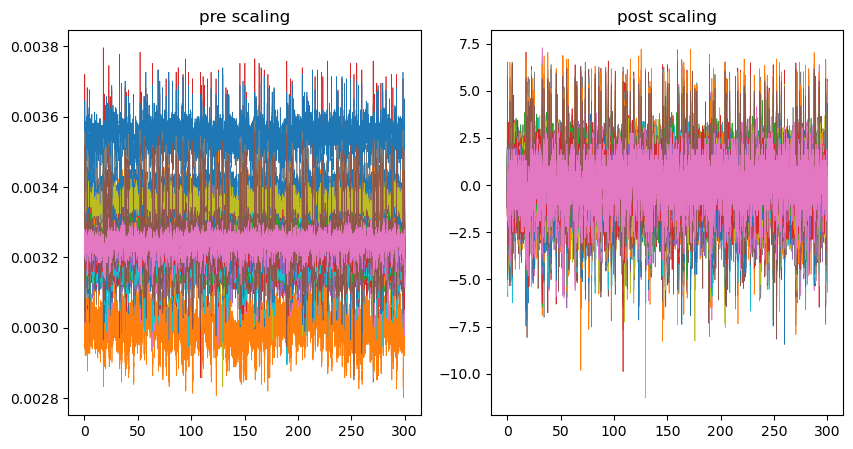

In [23]:
#Plot a subset of the channels
plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(t[:], X[:, ::10], linewidth = 0.5)
plt.title('pre scaling')

plt.subplot(122)
plt.plot(t[:], X_scaled[:, ::10], linewidth = 0.5)
plt.title('post scaling')
plt.show()

[0.38632894 0.05134041 0.01605263 0.01056859 0.00473714 0.00291607
 0.00273851 0.00231635 0.00220746 0.00213658]


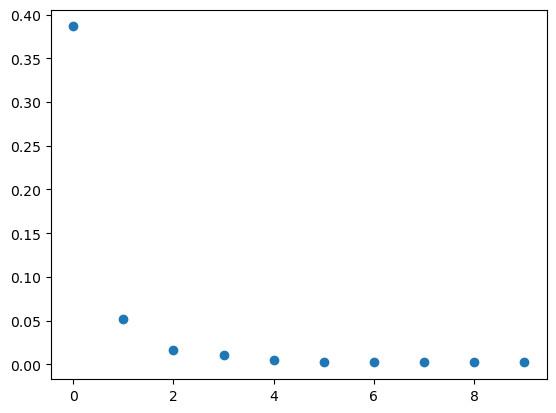

In [6]:
n_components = 10

pca = PCA(n_components)
X_pca = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
plt.scatter(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)


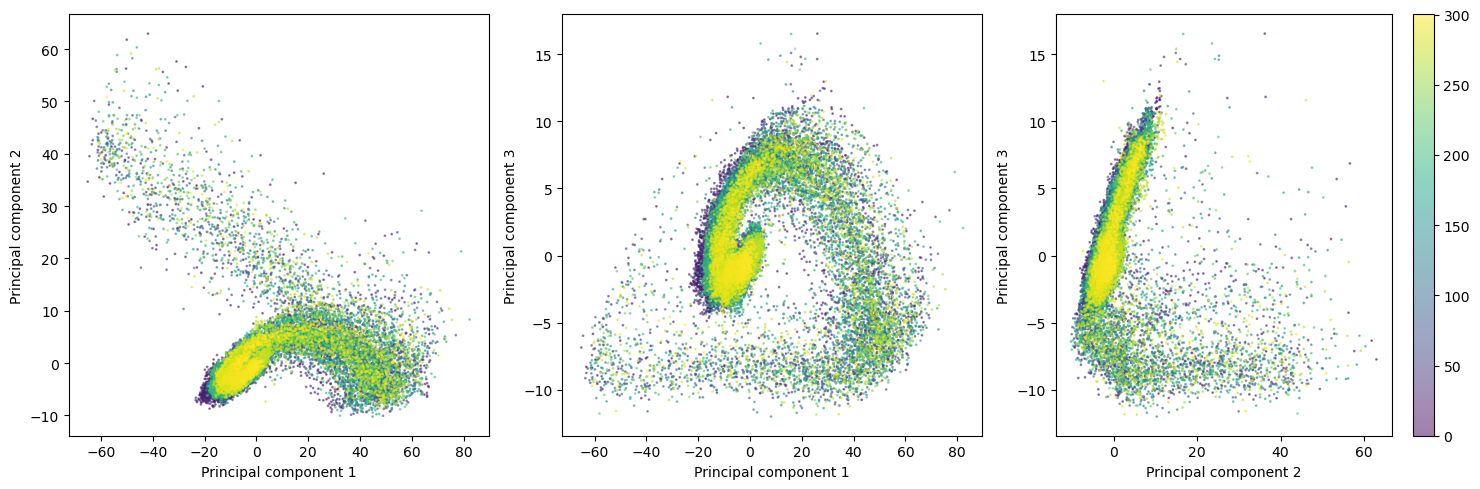

(37504, 10)


In [25]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = t, alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

print(np.shape(X_pca))

In [8]:
tsne = TSNE()
X_tsne = tsne.fit_transform(X_pca)

for i, perplexity in enumerate(np.arange(5, 6, 5)):
    tsne = TSNE(perplexity = perplexity)
    X_tsne[i] = tsne.fit_transform(X_pca)

KeyboardInterrupt: 

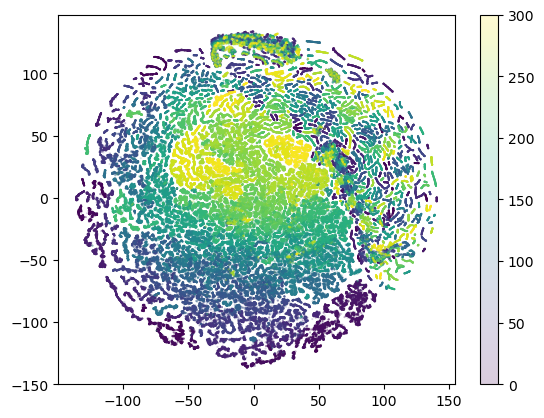

In [ ]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s = 0.2, alpha=0.2, c = t)
plt.colorbar()

In [12]:
X_isomap = list()
for i, neighbors in enumerate(np.arange(15, 150, 5)):
    isomap = Isomap(n_neighbors= neighbors)
    X_isomap.append(isomap.fit_transform(X_pca))

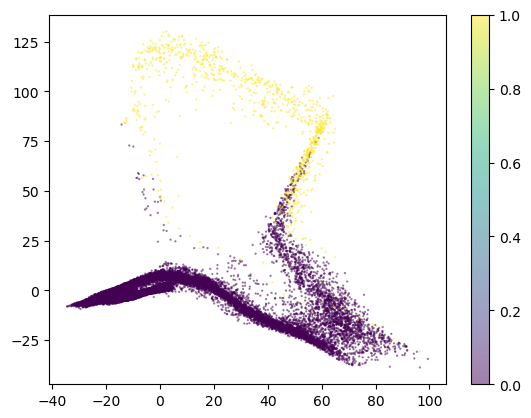

In [15]:
plt.scatter(X_isomap[0][:, 0], X_isomap[0][:, 1], s = 0.4, alpha=0.5, c = X_pca[:, 1] > 20)
plt.colorbar()

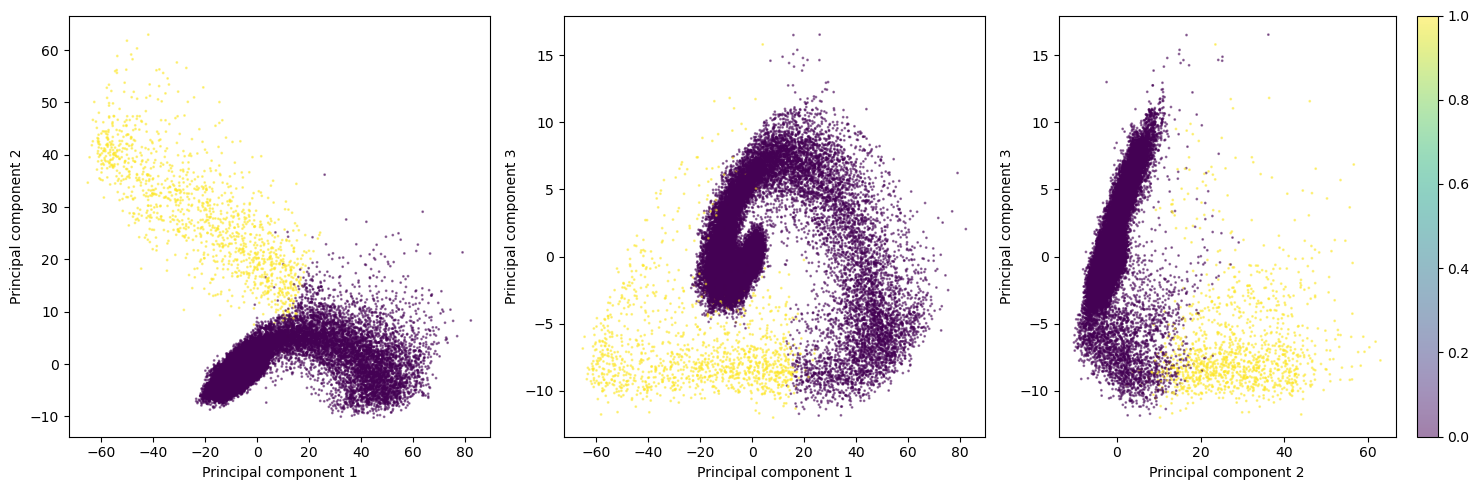

(37504, 10)


In [16]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = X_isomap[0][:, 1] > 25, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = X_isomap[0][:, 1] > 25, alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = X_isomap[0][:, 1] > 25, alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

print(np.shape(X_pca))

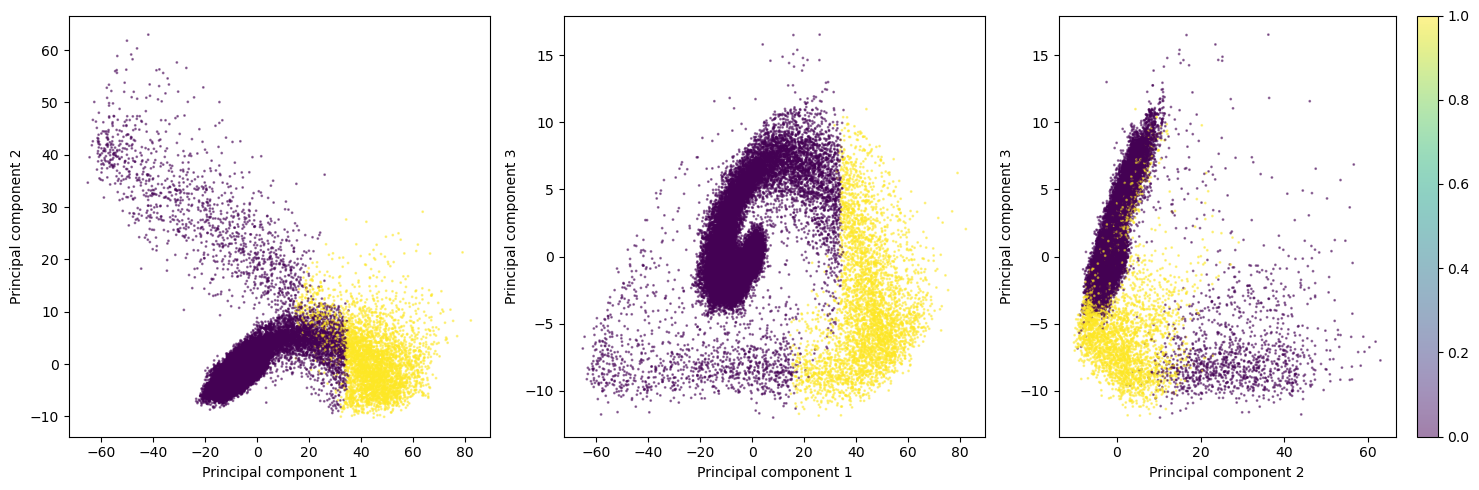

(37504, 10)


In [19]:
%matplotlib inline
fig = plt.figure(figsize = (15, 5))

plt.subplot(131)

plt.scatter(X_pca[:, 0], X_pca[:, 1],  s = 1, c = np.logical_and(X_isomap[0][:, 1] < 25, X_isomap[0][:, 0] > 40), alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

plt.subplot(132)

plt.scatter(X_pca[:, 0], X_pca[:, 2],  s = 1, c = np.logical_and(X_isomap[0][:, 1] < 25, X_isomap[0][:, 0] > 40), alpha = 0.5)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 3')

plt.subplot(133)
plt.scatter(X_pca[:, 1], X_pca[:, 2],  s = 1, c = np.logical_and(X_isomap[0][:, 1] < 25, X_isomap[0][:, 0] > 40), alpha = 0.5)
plt.colorbar()
plt.xlabel('Principal component 2')
plt.ylabel('Principal component 3')
plt.tight_layout()
plt.show()

print(np.shape(X_pca))